In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Data Cleaning

In [236]:
train = pd.read_csv("trained.csv")
test = pd.read_csv("tested.csv")
print(train.shape, test.shape)

(891, 12) (418, 12)


In [237]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived

In [238]:
df = pd.concat([train, test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [239]:
df.drop(columns=["PassengerId", "Ticket", "Cabin"], axis=1, inplace=True)
df.head(5)
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [240]:
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\trand\AppData\Local\Temp\ipykernel_16420\2201362152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].mean(), inplace=True)
C:\Users\trand\AppData\Local\Temp\ipykernel_16420\2201362152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Survived      0
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [241]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [242]:
df["Family_size"] = df['SibSp'] + df['Parch'] + 1
df.drop(columns=["Name", "SibSp", "Parch"], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
413,0,3,male,25.0,8.0500,S,1
414,1,1,female,39.0,108.9000,C,1
415,0,3,male,38.5,7.2500,S,1
416,0,3,male,25.0,8.0500,S,1


### EDA

In [243]:
df.info()

# Pclass: hạng vé (hạng 1 giàu,...)
# SibSp: số lượng ace rột, vợ chồng đi trên tàu
# Parch: số lượng cha mẹ, con cái đi trên tàu
# Fare: giá vé
# Embarked: cảng lên tàu: Giá trị:

# C → Cherbourg

# Q → Queenstown

# S → Southampton

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Embarked     1309 non-null   object 
 6   Family_size  1309 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 81.8+ KB


<Axes: xlabel='Sex', ylabel='count'>

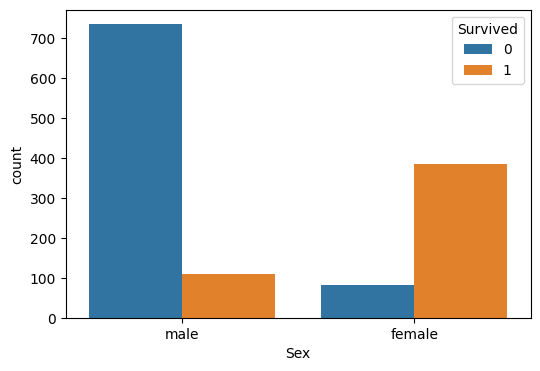

In [244]:
# số người sống sót theo giới tính
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived")

# -> Phụ nữ có tỷ lệ sống cao hơn

<Axes: xlabel='Pclass', ylabel='count'>

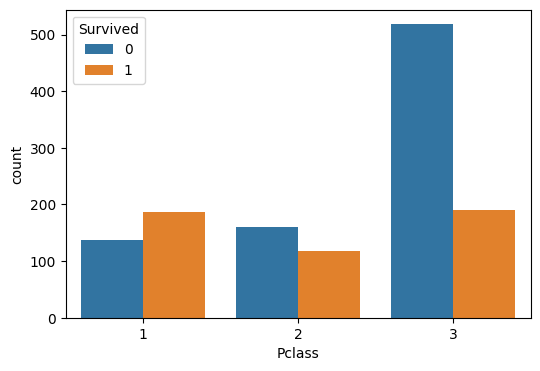

In [245]:
# số người sống sót theo hạng vé
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived")

# -> hạng càng sang tỷ lệ sống sót càng cao

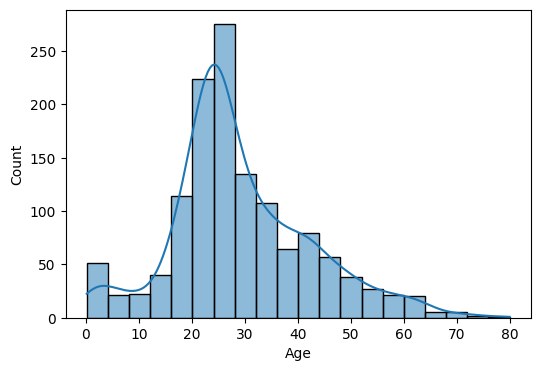

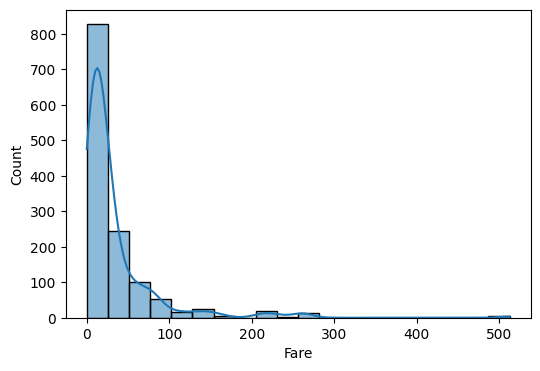

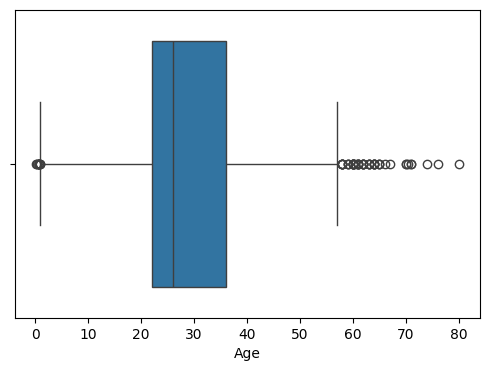

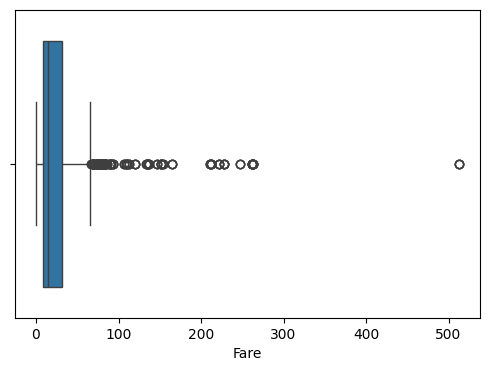

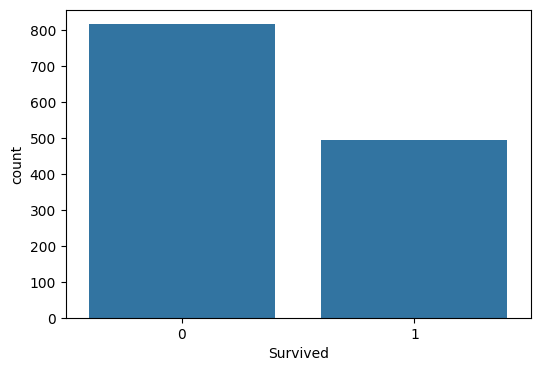

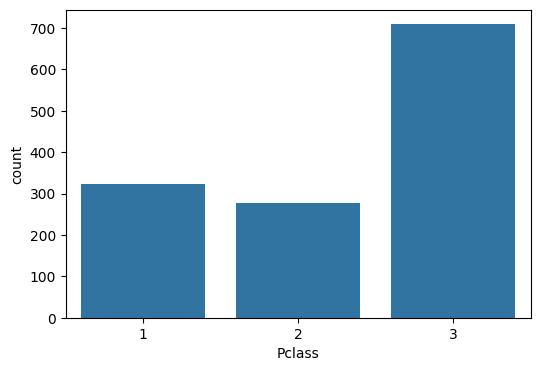

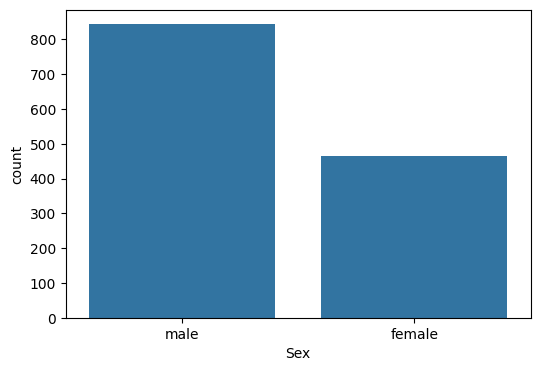

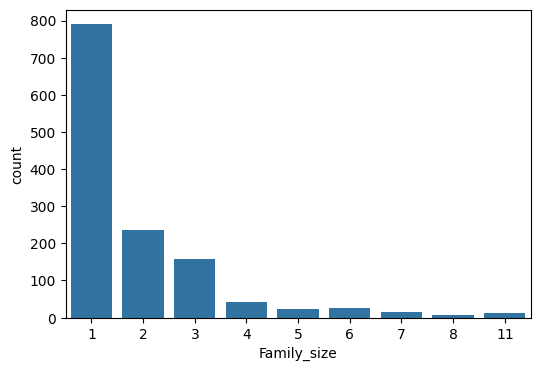

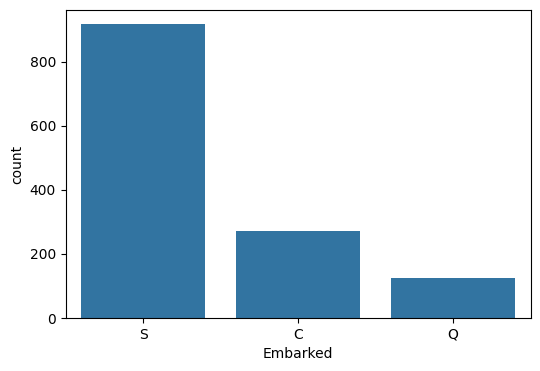

In [246]:
numberic_columns = ['Age', "Fare"]
categories_columns = ['Survived', 'Pclass', 'Sex', 'Family_size', 'Embarked']

for col in numberic_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df, x=col, kde=True, bins=20) # biểu đồ phân phối (biến só liên tục)


for col in numberic_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df, x = col) # boxplot chỉ dùng cho dữ liệu số
    
for col in categories_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(df, x=col) # biểu đồ đếm số lượng giá trị rời rạc, phân loại (categorical)

<Axes: >

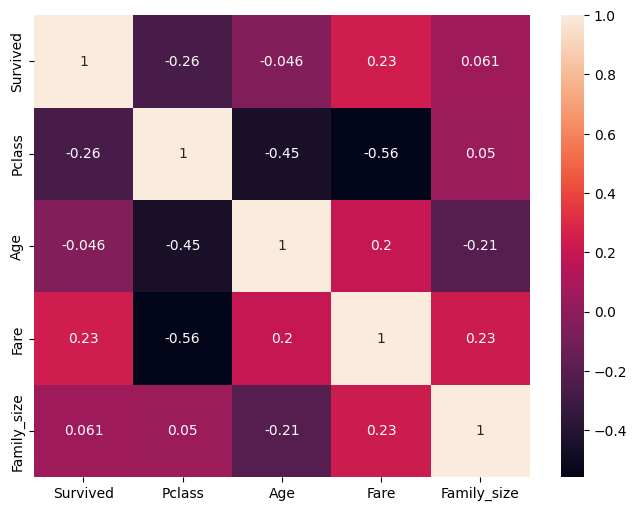

In [247]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [248]:
# Hạng càng cao (càng nghèo, tỷ lệ sống càng thấp) , tỷ lệ nghịch
# Tuổi càng cao, tỷ lệ sồng thấp hơn
# Giá vé càng cao, tỷ lệ sống càng cao
# Fmily_size có độ tương quan thuận thấp với tỷ lệ sống sót

### Feature Engineering

In [249]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Perceptron, RidgeClassifierCV, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [250]:
train = df[:890]
test = df[891:]
print(train.shape, test.shape)

(890, 7) (418, 7)


In [251]:
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']
print(X_train.shape, y_train.shape)

(890, 6) (890,)


In [252]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family_size
0,3,male,22.0,7.2500,S,2
1,1,female,38.0,71.2833,C,2
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,2
4,3,male,35.0,8.0500,S,1


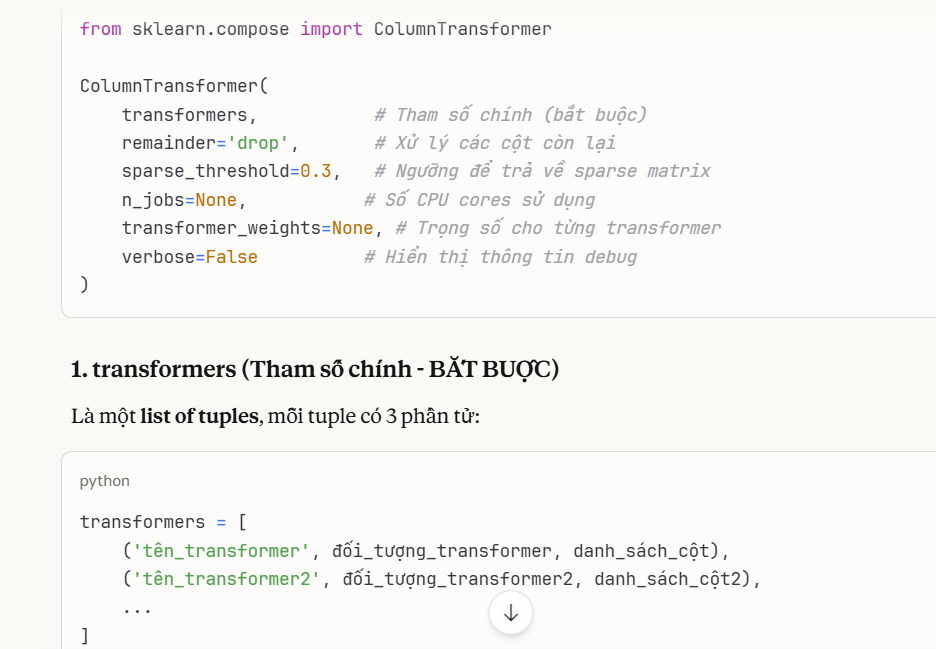

In [253]:
num_cat_tranformation = ColumnTransformer(
    [
        ('scaling', MinMaxScaler(), [2, 3, 5]),
        ('onehotencoding', OneHotEncoder(), [0, 4]),
        ('ordinalencoding', OrdinalEncoder(), [1])
    ],
    remainder="passthrough"
)

In [254]:
bins = ColumnTransformer(
    [
        ('Kbins', KBinsDiscretizer(), [2, 3])
    ],
    remainder="passthrough"
)

In [2]:
def create_pipeline(algorithm):
    return Pipeline(
        [
             ('num_cat_transformation', num_cat_tranformation),
            ('bins', bins),
            ('classifier', algorithm)
        ]
    )

### Model training

In [256]:
algorithms = [
    # linrear model
    LogisticRegression(),
    LogisticRegressionCV(),
    Perceptron(),
    RidgeClassifierCV(),
    SGDClassifier(),

    # svm
    SVC(probability=True),
    LinearSVC(),

    # naivi bayes
    MultinomialNB(),
    BernoulliNB(),

    # tree
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),

    # ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    # Gauss
    GaussianProcessClassifier(),

    # neigh
    KNeighborsClassifier(),
]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [ ]:
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())

NameError: name 'create_pipeline' is not defined

In [259]:
model_df = pd.DataFrame(
    {
        "Model": model_names,
        "Accuracy": CV_Accuracy
    }
)
model_df.sort_values(by="Accuracy", ascending=False, inplace=True)
model_df

,Model,Accuracy
16,GaussianProcessClassifier,0.808739
5,SVC,0.808711
14,GradientBoostingClassifier,0.808711
11,AdaBoostClassifier,0.796989
17,KNeighborsClassifier,0.796975
12,BaggingClassifier,0.796933
13,ExtraTreesClassifier,0.788543
6,LinearSVC,0.778529
15,RandomForestClassifier,0.778473
4,SGDClassifier,0.775280


In [260]:
# Lấy top n (ở đây n = 2) model có kết quả cao nhất
algo1 = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

algo2 = GradientBoostingClassifier(max_depth= 1, n_estimators=3, random_state=42, warm_start= True)

In [261]:

pipeline = Pipeline(
    [
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo1)
    ]
)
pipeline.fit(X_train, y_train)


d:\relearnPython\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\relearnPython\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:396: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\relearnPython\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:396: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elap

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('num_cat_transformation', ...), ('bins', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaling', ...), ('onehotencoding', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If th

In [262]:
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s


0.8129251700680272


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.3s finished
